# Leavenworth Benchmark tracker

In [1]:
import leavenworth as lc
import yfinance as yf
import pandas as pd
import janitor
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
import numpy as np

now = datetime.now()
start_date = now.date().replace(year=now.year -1,month=12, day=31).strftime('%Y-%m-%d')

In [2]:
import matplotlib.font_manager as font_manager
import os

# Add every font at the specified location
font_dir = os.path.join('C:\\', 'Users', 'rgrover1', 'Downloads', 'lcfonts')
for font in font_manager.findSystemFonts(font_dir):
    #print(font)
    font_manager.fontManager.addfont(font)

In [3]:
font = 'Legacy Sans ITC Pro'
image_scale = 2

In [4]:
def set_params(plot_style, **kwargs):
    from seaborn import set_context, set_style
    font_scale = kwargs.setdefault('font_scale', 1.5)
    linewidth = kwargs.setdefault('linewidth', 1)
    sns.set(font=font)
    set_context("notebook", font_scale = font_scale, rc = {"lines.linewidth":linewidth})

    if plot_style == 'dark':
        from jupyterthemes import jtplot
        jtplot.style(theme='onedork')
        title_color = 'gold'
        cmap = 'Reds'
    else:
        import matplotlib.pyplot as plt
        #rcParams['font.family'] = 'ITC'
        plt.style.use('fivethirtyeight')
        # set_style("whitegrid")
        title_color = 'black'
        cmap = 'Reds'
    
    params = {}
    params['title_color'] = title_color
    params['cmap'] = cmap
    # Create an array with the colors you want to use
    colors = ['#cc9933', "#2e4959", '#cccccc', "#7C9eA6", '#434343']
    # sns.set(font="Times New Roman")
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    return(params)

In [5]:
def returns(df, t, period = 'month'):
    if period == 'month':
        s = (df.resample('M').last()[t].pct_change()).round(4)
    elif period == 'quarter':
        s = (df.resample('Q').last()[t].pct_change()).round(4)
    elif period == 'year':
        s = (df.resample('Y').last()[t].pct_change()).round(4)
    elif period == 'last1Y':
        s = (df.resample('M').last().tail(13)[t].pct_change()).round(4)
    else:
        raise Exception('Invalid period.')
    return s

In [6]:
params = set_params('light')

In [7]:
yf.__version__

'0.1.63'

# Ticker Def

In [8]:
tickers = ['^GSPC', 'GLD', 'BTC-USD', 'GBTC', 'ETH-USD', 'ETHE']

Comment out line below if you want to run comps against GBTC and ETHE

In [9]:
 tickers = ['^GSPC', 'GBTC']

# Data pull

In [10]:
price = pd.DataFrame()
for ticker in tickers:
    s = yf.Ticker(ticker)
    h = s.history(period = '5y')
    h['TICKER'] = ticker
    price = price.append(h)

In [11]:
pivot = price.reset_index().pivot_table(index = 'Date', columns = 'TICKER', values = 'Close', aggfunc = 'mean')

In [12]:
pivot = pivot.loc['2020-11-30':'2022-03-31']

In [13]:
pivot

TICKER,GBTC,^GSPC
Date,,
2020-11-30,23.194000,3621.629883
2020-12-01,23.740000,3662.449951
2020-12-02,23.389999,3669.010010
2020-12-03,24.000000,3666.719971
2020-12-04,23.219999,3699.120117
...,...,...
2022-03-25,30.170000,4543.060059
2022-03-28,32.810001,4575.520020
2022-03-29,32.869999,4631.600098


# Monthly returns

In [14]:
mr = pd.DataFrame()
for ticker in tickers:
    s = returns(pivot, ticker, period = 'month')
    mr[ticker] = s

In [15]:
mr

,^GSPC,GBTC
Date,,
2020-11-30,NaN,NaN
2020-12-31,0.0371,0.3797
2021-01-31,-0.0111,0.0841
2021-02-28,0.0261,0.2453
2021-03-31,0.0424,0.1583
2021-04-30,0.0524,-0.0637
2021-05-31,0.0055,-0.3550
2021-06-30,0.0222,-0.0136
2021-07-31,0.0227,0.1652


In [16]:
mr = mr.rename_column('^GSPC', 'S&P500')
mr = mr.reset_index()

In [17]:
mr['BTCUSD'] = pd.Series([np.nan, .465, .1526, .3254, .3377, -.042, -.3486, -.0519, 0.1941, 0.1503, -0.0956, 0.40762, -0.0322, -0.1820, -0.2127, 0.0691, 0.1519])
mr['Leavenworth Digital Growth'] = pd.Series([np.nan, .3846, .3606, .2974, .3380, -.0408, -.3476, -.051, 0.1948, 0.1425, -0.0876, 0.4292, -0.0322, -0.1820, -0.2127, 0.0691, 0.1895])

mr['LDGS_NOF'] = mr['Leavenworth Digital Growth']-0.02/12

(mr['LDGS_NOF'][1:]+1).cumprod()-1

This is to stack the colums with Leavenworth first followed by BTCUSD

In [18]:
mr.columns.tolist()

['Date', 'S&P500', 'GBTC', 'BTCUSD', 'Leavenworth Digital Growth']

In [19]:
first_cols = ['Leavenworth Digital Growth', 'BTCUSD']
cols = first_cols + [x for x in mr.columns.tolist() if x not in first_cols]
cols

['Leavenworth Digital Growth', 'BTCUSD', 'Date', 'S&P500', 'GBTC']

In [20]:
mr = mr[cols]

In [21]:
mr

,Leavenworth Digital Growth,BTCUSD,Date,S&P500,GBTC
0,NaN,NaN,2020-11-30,NaN,NaN
1,0.3846,0.46500,2020-12-31,0.0371,0.3797
2,0.3606,0.15260,2021-01-31,-0.0111,0.0841
3,0.2974,0.32540,2021-02-28,0.0261,0.2453
4,0.3380,0.33770,2021-03-31,0.0424,0.1583
5,-0.0408,-0.04200,2021-04-30,0.0524,-0.0637
6,-0.3476,-0.34860,2021-05-31,0.0055,-0.3550
7,-0.0510,-0.05190,2021-06-30,0.0222,-0.0136
8,0.1948,0.19410,2021-07-31,0.0227,0.1652
9,0.1425,0.15030,2021-08-31,0.0290,0.0874


In [22]:
mr['DATE'] = mr.Date.apply(lambda x: x.strftime("%Y-%b"))

In [23]:
mr

,Leavenworth Digital Growth,BTCUSD,Date,S&P500,GBTC,DATE
0,NaN,NaN,2020-11-30,NaN,NaN,2020-Nov
1,0.3846,0.46500,2020-12-31,0.0371,0.3797,2020-Dec
2,0.3606,0.15260,2021-01-31,-0.0111,0.0841,2021-Jan
3,0.2974,0.32540,2021-02-28,0.0261,0.2453,2021-Feb
4,0.3380,0.33770,2021-03-31,0.0424,0.1583,2021-Mar
5,-0.0408,-0.04200,2021-04-30,0.0524,-0.0637,2021-Apr
6,-0.3476,-0.34860,2021-05-31,0.0055,-0.3550,2021-May
7,-0.0510,-0.05190,2021-06-30,0.0222,-0.0136,2021-Jun
8,0.1948,0.19410,2021-07-31,0.0227,0.1652,2021-Jul
9,0.1425,0.15030,2021-08-31,0.0290,0.0874,2021-Aug


In [24]:
#mr['DATE'] = mr.Date.apply(lambda x: x.strftime("%Y-%b"))
mrd = mr.set_index('DATE').remove_columns('Date')

In [25]:
mrd.dropna().T

DATE,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2021-Apr,2021-May,2021-Jun,2021-Jul,2021-Aug,2021-Sep,2021-Oct,2021-Nov,2021-Dec,2022-Jan,2022-Feb,2022-Mar
Leavenworth Digital Growth,0.3846,0.3606,0.2974,0.3380,-0.0408,-0.3476,-0.0510,0.1948,0.1425,-0.0876,0.42920,-0.0322,-0.1820,-0.2127,0.0691,0.1895
BTCUSD,0.4650,0.1526,0.3254,0.3377,-0.0420,-0.3486,-0.0519,0.1941,0.1503,-0.0956,0.40762,-0.0322,-0.1820,-0.2127,0.0691,0.1519
S&P500,0.0371,-0.0111,0.0261,0.0424,0.0524,0.0055,0.0222,0.0227,0.0290,-0.0476,0.06910,-0.0083,0.0436,-0.0526,-0.0314,0.0358
GBTC,0.3797,0.0841,0.2453,0.1583,-0.0637,-0.3550,-0.0136,0.1652,0.0874,-0.1038,0.46790,-0.0698,-0.2590,-0.2339,0.1200,0.0391


In [26]:
mr = mr.set_index('Date')
mrx = mr.dropna().set_index('DATE').stack().reset_index().rename_column('level_1','TICKER').rename_column(0, 'VALUE')
mrx['RETURN'] = mrx.VALUE*100

mrx

In [27]:
from seaborn import set_context, set_style
set_context("notebook", font_scale = 2.5, rc = {"lines.linewidth":1})

In [28]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        #patch.set_x(patch.get_x() + diff * .5)

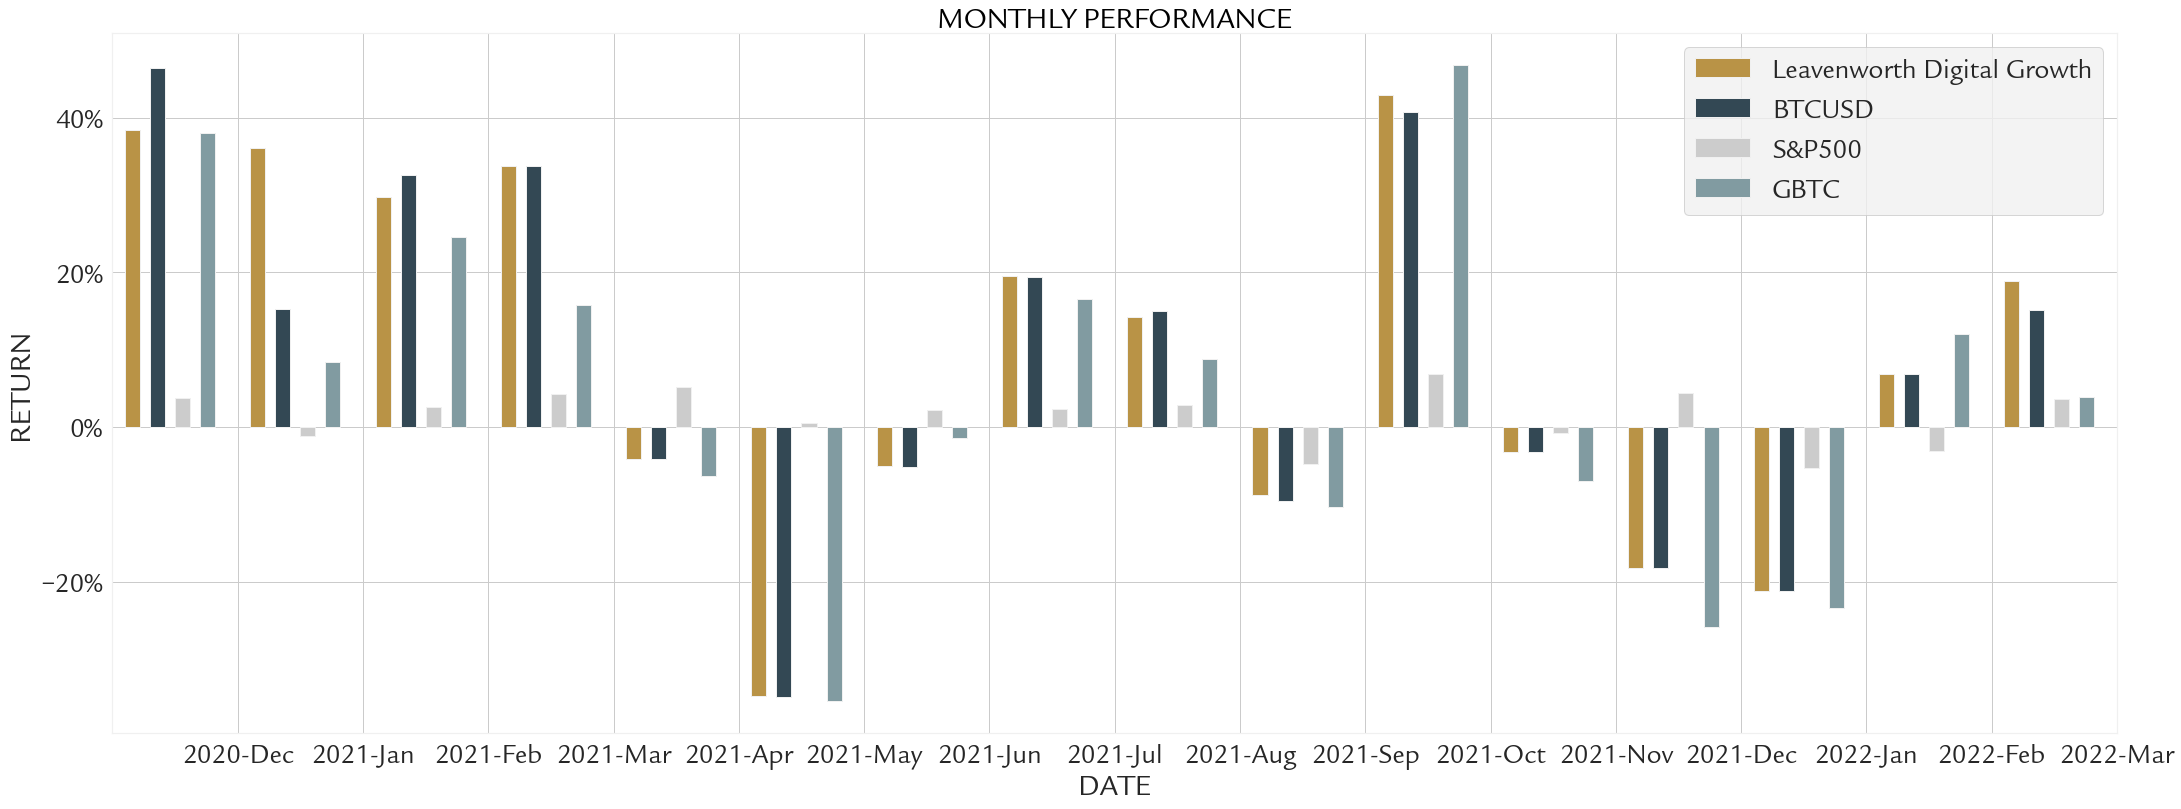

In [29]:
f, ax = plt.subplots(figsize = (16*image_scale, 6*image_scale))
ax = sns.barplot(data = mrx, x = 'DATE', y = 'RETURN', hue = 'TICKER')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(np.arange(0.5, len(mrx.DATE.unique()), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels())
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 0)
ax.grid(True)
lc.whiten_grid(f, ax)
change_width(ax, .12)
plt.title('Monthly performance'.upper(), color = params['title_color']);

# YTD returns

Since inception

In [30]:
mr[['Leavenworth Digital Growth', 'BTCUSD']]*100

,Leavenworth Digital Growth,BTCUSD
Date,,
2020-11-30,NaN,NaN
2020-12-31,38.46,46.500
2021-01-31,36.06,15.260
2021-02-28,29.74,32.540
2021-03-31,33.80,33.770
2021-04-30,-4.08,-4.200
2021-05-31,-34.76,-34.860
2021-06-30,-5.10,-5.190
2021-07-31,19.48,19.410


Since Inception

In [31]:
((mr['Leavenworth Digital Growth']+1).cumprod()-1).tail(1)*100

Date
2022-03-31    174.009608
Name: Leavenworth Digital Growth, dtype: float64

last 1Y

In [32]:
((mr['Leavenworth Digital Growth'][-12:]+1).cumprod()-1).tail(1)*100

Date
2022-03-31   -16.212161
Name: Leavenworth Digital Growth, dtype: float64

last 3M

In [33]:
((mr['Leavenworth Digital Growth'][-3:]+1).cumprod()-1).tail(1)*100

Date
2022-03-31    0.120504
Name: Leavenworth Digital Growth, dtype: float64

Benchmark

Since Inception

In [34]:
((mr['BTCUSD']+1).cumprod()-1).tail(1)*100

Date
2022-03-31    137.738449
Name: BTCUSD, dtype: float64

In [35]:
((mr['BTCUSD'][-3:]+1).cumprod()-1).tail(1)*100

Date
2022-03-31   -3.044297
Name: BTCUSD, dtype: float64

Last 1Y

In [36]:
((mr['BTCUSD'][-12:]+1).cumprod()-1).tail(1)*100

Date
2022-03-31   -20.58958
Name: BTCUSD, dtype: float64

YTD

In [37]:
start_month_ = 14

In [38]:
(mr['Leavenworth Digital Growth'][start_month_:])

Date
2022-01-31   -0.2127
2022-02-28    0.0691
2022-03-31    0.1895
Name: Leavenworth Digital Growth, dtype: float64

In [39]:
ldgs_ytd = ((mr['Leavenworth Digital Growth'][start_month_:]+1).cumprod()-1).tail(1).values[0]

In [40]:
btc_ytd = ((mr['BTCUSD'][start_month_:]+1).cumprod()-1).tail(1).values[0]

In [41]:
ldgs_ytd*100

0.12050404849999197

In [42]:
btc_ytd

-0.030442970883000076

In [43]:
end_date = '2022-03-31'

In [44]:
tickers

['^GSPC', 'GBTC']

In [45]:
pivot.resample('M').last().tail(12)

TICKER,GBTC,^GSPC
Date,,
2021-04-30,46.849998,4181.169922
2021-05-31,30.219999,4204.109863
2021-06-30,29.809999,4297.500000
2021-07-31,34.735001,4395.259766
2021-08-31,37.770000,4522.680176
2021-09-30,33.849998,4307.540039
2021-10-31,49.689999,4605.379883
2021-11-30,46.220001,4567.000000
2021-12-31,34.250000,4766.180176


Get last 12 months of data in terms of last 1Y returns

In [46]:
l1y = pd.DataFrame()
for ticker in tickers:
    s = returns(pivot.loc[start_date: end_date], ticker, period = 'year')
    l1y[ticker] = s

In [47]:
ytdr = pd.DataFrame()
for c in l1y.columns.tolist():
    s = (l1y[c][1:]+1).cumprod()-1
    ytdr[c] = s.tail(1)

In [48]:
ytdr

,^GSPC,GBTC
Date,,
2022-12-31,-0.0495,-0.1083


In [49]:
ytdr = ytdr.dropna().reset_index()
ytdr.rename_column('Date', 'YTD')
ytdr = ytdr.clean_names(case_type = 'upper')
ytdr.loc[0, 'YTD'] = 'YTD'
ytdr = ytdr.set_index('YTD')

In [50]:
ytdr = ytdr.rename_column('^GSPC', 'S&P500')

In [51]:
ytdr

,DATE,S&P500,GBTC
YTD,,,
YTD,2022-12-31,-0.0495,-0.1083


In [52]:
(27.49-32.06)/32.06

-0.14254522769806624

In [68]:
(27.49-25)/25

0.09959999999999994

In [53]:
ytdr['Leavenworth Digital Growth'] = ldgs_ytd
ytdr['BTCUSD'] = btc_ytd
ytdr['IDX'] = -0.1425

In [54]:
ytdr = ytdr[['Leavenworth Digital Growth', 'BTCUSD', 'S&P500', 'IDX', 'GBTC']]

In [55]:
ytdrx = ytdr.stack().reset_index().rename_column('level_1','TICKER').rename_column(0, 'VALUE')
ytdrx['RETURN'] = ytdrx.VALUE*100

In [56]:
ytdrx

,YTD,TICKER,VALUE,RETURN
0,YTD,Leavenworth Digital Growth,0.001205,0.120504
1,YTD,BTCUSD,-0.030443,-3.044297
2,YTD,S&P500,-0.049500,-4.950000
3,YTD,IDX,-0.142500,-14.250000
4,YTD,GBTC,-0.108300,-10.830000


YTD as of Aug 17, 
GBTC is up 7%
BRR is up 57.26%
LCDG is up > 70%

In [57]:
if image_scale == 1:
    fxy = (10,4)
else:
    fxy = (10*image_scale, 6*image_scale)

In [58]:
dt = now.date().strftime('%b %d, %Y')

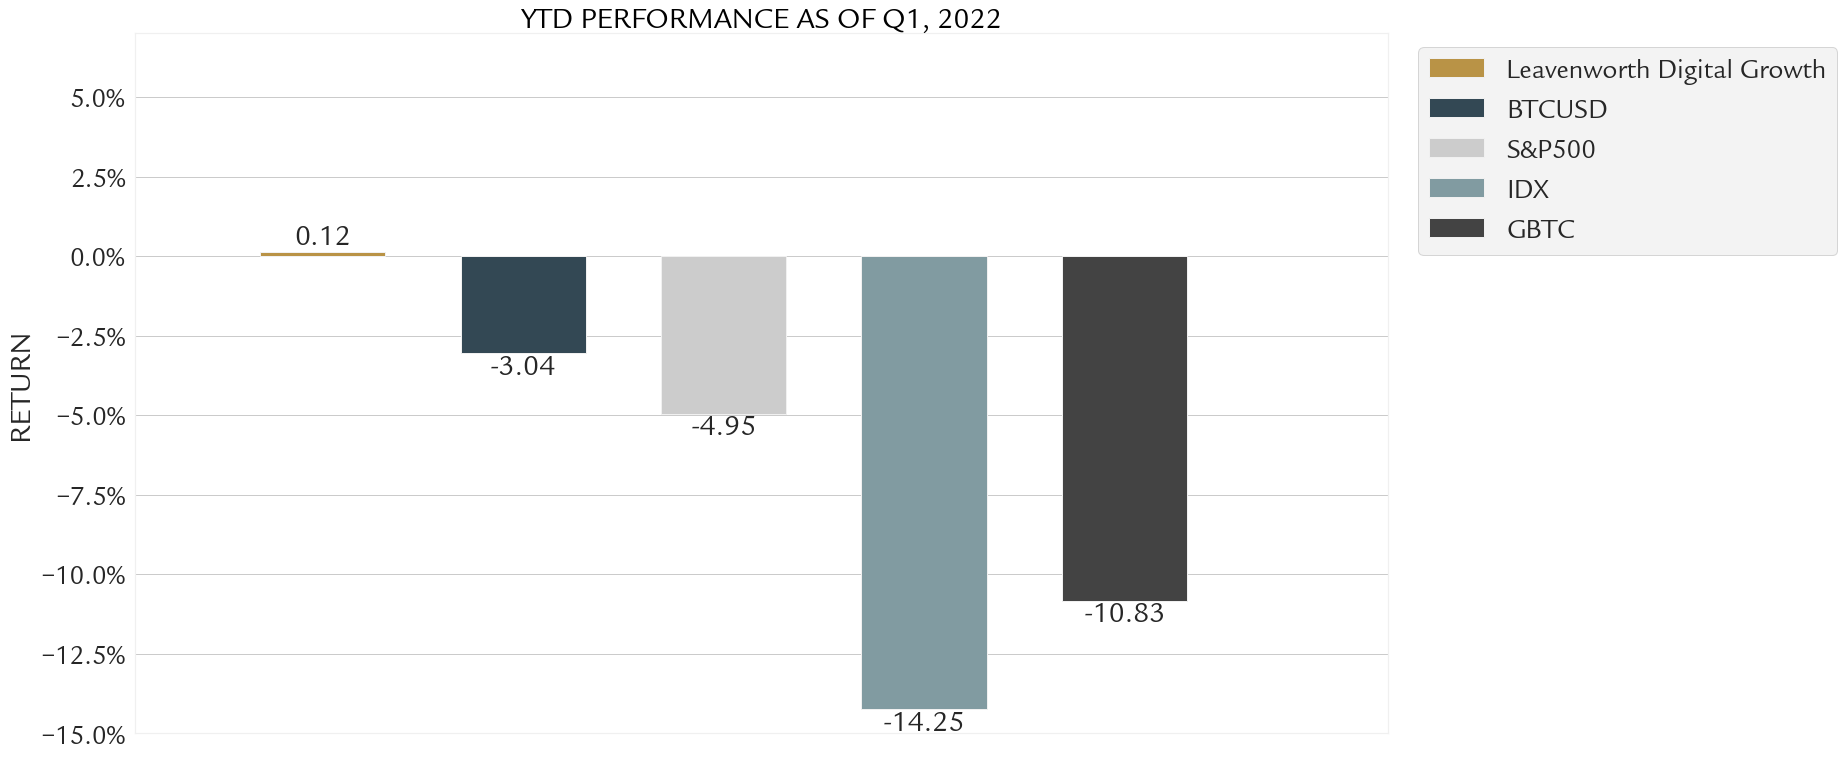

In [67]:
f, ax = plt.subplots(figsize = fxy)
ax = sns.barplot(data = ytdrx, x = 'YTD', y = 'RETURN', hue = 'TICKER')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor = (1.37,1))
plt.xticks(rotation = 0)
plt.xlabel('')
ax.set(xticklabels=[]);
# widthbars = [0.05, 0.05, 0.05, 0.05, 0.05]
#for bar, nw in zip(ax.patches, widthbars):
#    x = bar.get_x()
#    width = bar.get_width()
#    center = x+width/2
#    bar.set_x(center - nw/2)
#    bar.set_width(nw)
lc.whiten_grid(f, ax)
#ax.spines['top'].set_color('#2e4959')
#ax.spines['top'].set_linewidth(2)
change_width(ax, .1)
plt.ylim(-15, 7)
bars = list(range(0,len(ax.containers)))
for bar in bars:
    ax.bar_label(ax.containers[bar],  fmt='%.2f')
#plt.title('YTD PERFORMANCE as of %s'%dt.upper(), color = 'black');
plt.title('YTD PERFORMANCE as of Q1, 2022'.upper(), color = 'black');
#plt.title('January, 2021 performance'.upper(), x=0.07, y=1.02 );

# Quarterly Performance

In [ ]:
tickers

In [ ]:
qr = pd.DataFrame()
for ticker in tickers:
    s = returns(pivot, ticker, period = 'quarter')
    qr[ticker] = s

In [ ]:
qr = qr.rename_column('^GSPC', 'S&P500')
qr = qr.reset_index().clean_names(case_type = 'upper')

In [ ]:
mr['Leavenworth Digital Growth'][-3:]

In [ ]:
((mr['Leavenworth Digital Growth'][-3:]+1).cumprod()-1).tail(1)*100

In [ ]:
((mr['BTCUSD'][-3:]+1).cumprod()-1).tail(1)*100

In [ ]:
qr['Leavenworth Digital Growth'] = pd.Series([np.nan, 1.3619, -0.4061, 0.2455, 0.1314])
qr['BTCUSD'] = pd.Series([np.nan, 1.0435, -.4083, 0.2423, 0.1144])

In [ ]:
qr.dropna()

In [ ]:
qr = qr.dropna()

In [ ]:
qr = qr[['Leavenworth Digital Growth', 'BTCUSD', 'S&P500', 'GLD', 'GBTC', 'DATE']]

In [ ]:
qr['DATE'] = qr.DATE.astype(str)

In [ ]:
qr.loc[1, 'DATE'] = '2021Q1'
qr.loc[2, 'DATE'] = '2021Q2'
qr.loc[3, 'DATE'] = '2021Q3'
qr.loc[4, 'DATE'] = '2021Q4'

In [ ]:
qr = qr.set_index('DATE')

In [ ]:
qrx = qr.stack().reset_index().rename_column('level_1','TICKER').rename_column(0, 'VALUE')
qrx['RETURN'] = qrx.VALUE*100

In [ ]:
qrx

In [ ]:
if image_scale == 1:
    fxy = (10,4)
else:
    fxy = (10*image_scale, 6*image_scale)

In [ ]:
f, ax = plt.subplots(figsize = fxy)
ax = sns.barplot(data = qrx, x = 'DATE', y = 'RETURN', hue = 'TICKER')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor = (1.,1))
plt.xticks(rotation = 0)
plt.xlabel('QUARTER');
lc.whiten_grid(f, ax)
change_width(ax, .15)
plt.title('Quarterly performance'.upper(), color = 'black');